In [1]:
import gymnasium as gym
import math
import numpy as np
import matplotlib.pyplot as plt

from classical_rl_algs import *

env = gym.make('CliffWalking-v0')

pygame 2.1.0 (SDL 2.0.16, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# CONFIRM: Why SARSA's performance decreases when step size is large? Page 133/155.
sarsa_agent = SARSA(num_states=env.observation_space.n, num_actions=env.action_space.n, step_size=0.1, epsilon=0.1, discount=0.9)
sarsa_rewards = sarsa_agent.learn(env, step_limit=10000)

q_agent = Q_Learning(num_states=env.observation_space.n, num_actions=env.action_space.n, step_size=0.1, epsilon=0.1, discount=0.9)
q_rewards = q_agent.learn(env, step_limit=10000)

expected_sarsa_agent = Expected_SARSA(num_states=env.observation_space.n, num_actions=env.action_space.n, step_size=0.1, epsilon=0.1, discount=0.9)
expected_sarsa_rewards = expected_sarsa_agent.learn(env, step_limit=10000)

n_sarsa_agent = N_SARSA(num_states=env.observation_space.n, num_actions=env.action_space.n, step_size=0.1, epsilon=0.1, discount=0.9, n_step=2)
n_sarsa_rewards = n_sarsa_agent.learn(env, step_limit=10000)

tree_backup_agent = Tree_Backup(num_states=env.observation_space.n, num_actions=env.action_space.n, step_size=0.1, epsilon=0.1, discount=0.9, n_step=2)
tree_backup_rewards = tree_backup_agent.learn(env, step_limit=10000)

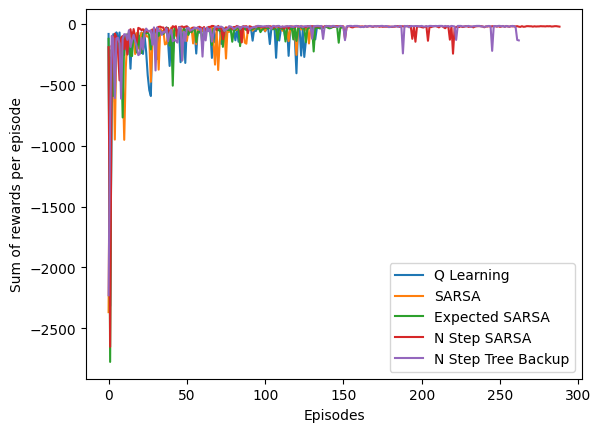

In [3]:
def smooth(scalars: list[float], weight: float=0) -> list[float]:
    """
    EMA implementation according to
    https://github.com/tensorflow/tensorboard/blob/34877f15153e1a2087316b9952c931807a122aa7/tensorboard/components/vz_line_chart2/line-chart.ts#L699
    """
    last = 0
    smoothed = []
    num_acc = 0
    for next_val in scalars:
        last = last * weight + (1 - weight) * next_val
        num_acc += 1
        # de-bias
        debias_weight = 1
        if weight != 1:
            debias_weight = 1 - math.pow(weight, num_acc)
        smoothed_val = last / debias_weight
        smoothed.append(smoothed_val)

    return smoothed

# plt.figure(figsize=(20, 16))
plt.plot([*range(len(q_rewards))], smooth(q_rewards), label='Q Learning')
plt.plot([*range(len(sarsa_rewards))], smooth(sarsa_rewards), label='SARSA')
plt.plot([*range(len(expected_sarsa_rewards))], smooth(expected_sarsa_rewards), label='Expected SARSA')
plt.plot([*range(len(n_sarsa_rewards))], smooth(n_sarsa_rewards), label='N Step SARSA')
plt.plot([*range(len(tree_backup_rewards))], smooth(tree_backup_rewards), label='N Step Tree Backup')
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Sum of rewards per episode")
# plt.ylim(-500, 0)
# plt.xlim(2000, 2100)
plt.show()

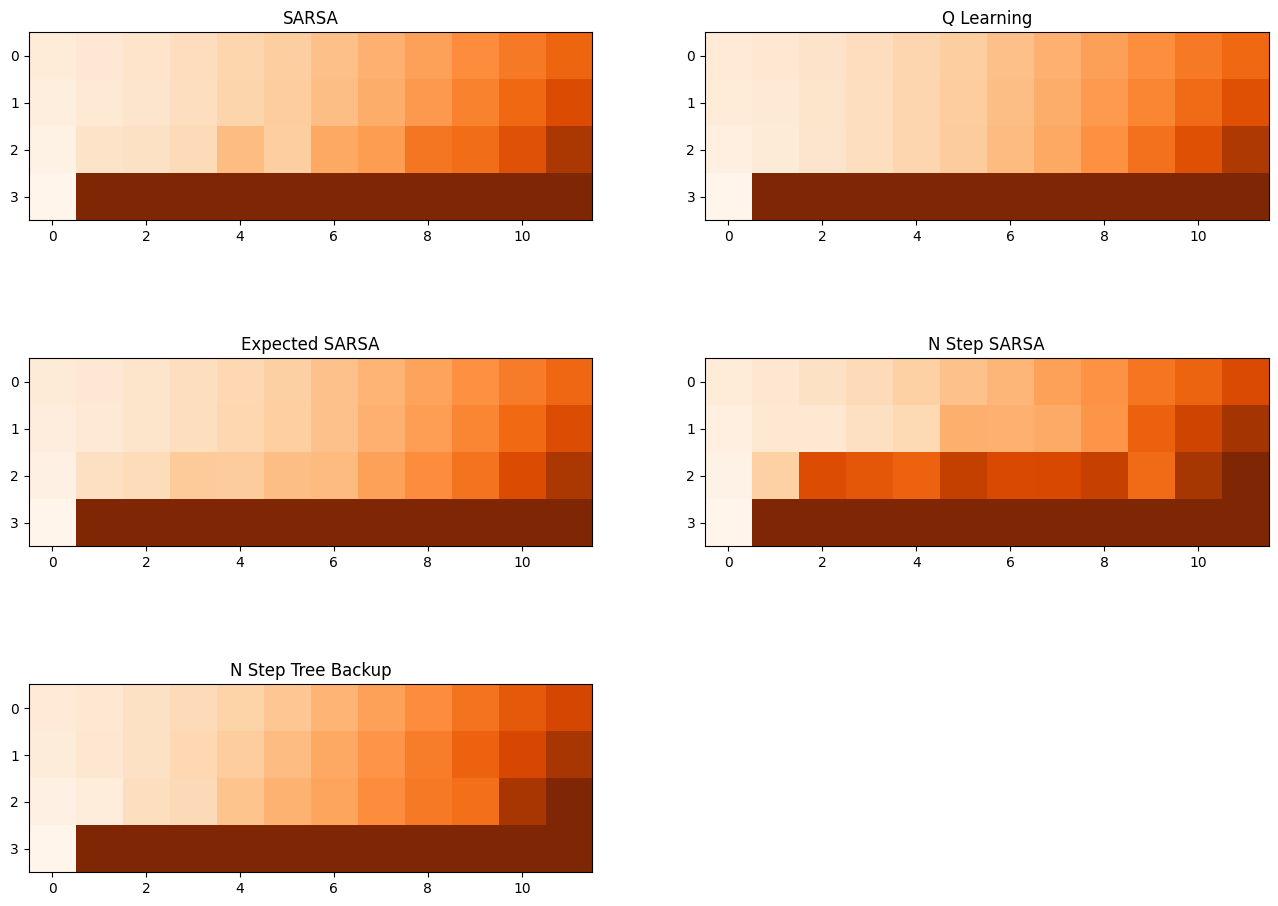

In [4]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 1)
plt.imshow(sarsa_agent.q_table.max(axis=1).reshape(4, 12), cmap='Oranges')
plt.title("SARSA")
plt.subplot(3, 2, 2)
plt.imshow(q_agent.q_table.max(axis=1).reshape(4, 12), cmap='Oranges')
plt.title("Q Learning")
plt.subplot(3, 2, 3)
plt.imshow(expected_sarsa_agent.q_table.max(axis=1).reshape(4, 12), cmap='Oranges')
plt.title("Expected SARSA")
plt.subplot(3, 2, 4)
plt.imshow(n_sarsa_agent.q_table.max(axis=1).reshape(4, 12), cmap='Oranges')
plt.title("N Step SARSA")
plt.subplot(3, 2, 5)
plt.imshow(tree_backup_agent.q_table.max(axis=1).reshape(4, 12), cmap='Oranges')
plt.title("N Step Tree Backup")
# plt.subplot(3, 2, 6)
# plt.colorbar() 
plt.show()
# CONFIRM: the cliff states are not updated because of the transition to the initial state.

In [5]:
# video_env = gym.wrappers.RecordVideo(gym.make('CliffWalking-v0', render_mode="rgb_array"), video_folder="cliff_walking_eval", name_prefix="eval", episode_trigger=lambda x: True)
# obs, info = video_env.reset()
# expected_sarsa_agent.reset()
# for _ in range(100):
#     action = expected_sarsa_agent.sample_action(obs)
#     obs, reward, terminated, truncated, info = video_env.step(action)

#     if terminated or truncated:
#         break
    
# expected_sarsa_agent.reset()
# video_env.close()